# Formulating the Question
We moeten een binary-calsification maken terwijl de data meerdere opties geeft (setosa, versicolor en verginica), hierom kiezen we er voor om er een ja/nee vraag van te maken.
We kiezen Iris-setoas als target(Is de entry een setosa of niet?).

# Finding and Understanding the data

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Importing the dataset
iris = pd.read_csv("Iris_with_outliers.csv")
iris.describe()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,173.000000,173.000000,170.000000,172.000000,169.000000,171.000000
mean,86.000000,86.000000,5.834118,3.068605,3.718935,1.171345
std,50.084928,50.084928,0.844972,0.444922,1.778207,0.763774
min,0.000000,0.000000,4.300000,2.000000,1.000000,0.100000
25%,43.000000,43.000000,5.100000,2.800000,1.500000,0.300000
50%,86.000000,86.000000,5.800000,3.000000,4.300000,1.300000
75%,129.000000,129.000000,6.400000,3.400000,5.100000,1.800000
max,172.000000,172.000000,8.000000,4.400000,6.900000,2.500000


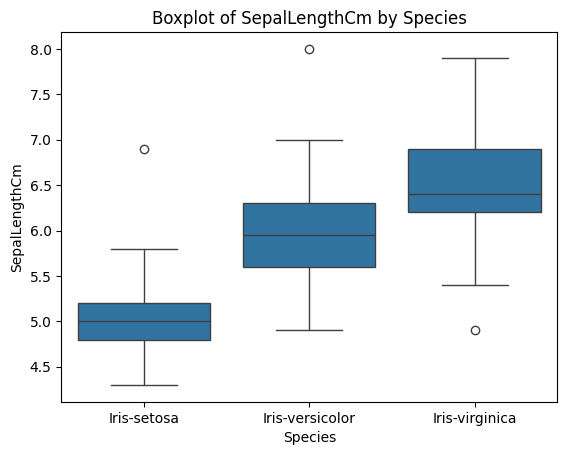

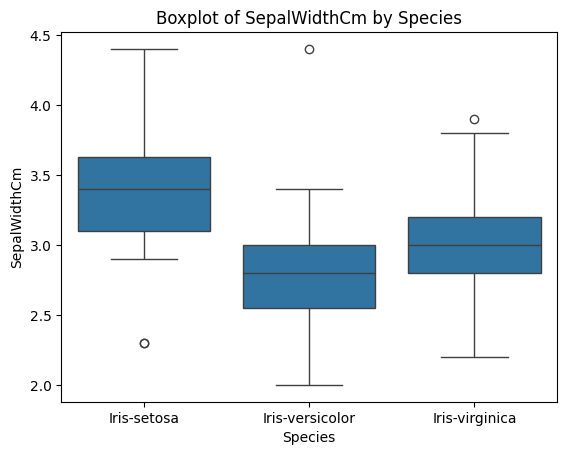

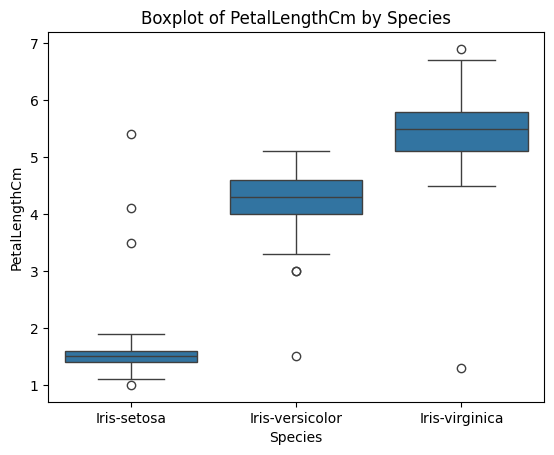

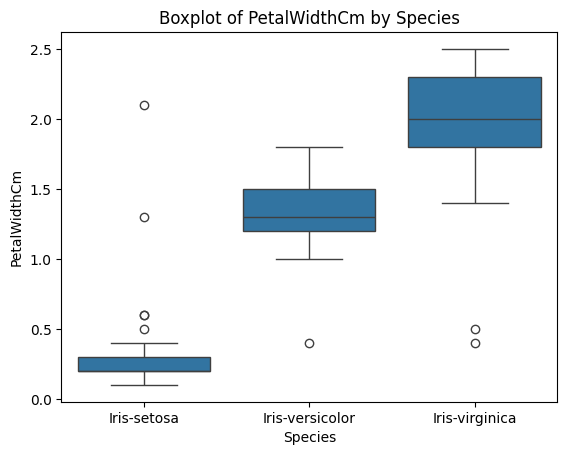

In [118]:
# boxplotting each feature in the dataset
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for feature in features:
    sns.boxplot(x = 'Species', y = feature, data = iris)
    plt.title('Boxplot of ' + feature + ' by Species')
    plt.show()

Uit al deze boxplots is te zien dat er best veel outliers zijn binne onze dataset. Hierdoor raakt de data geskewed omdat het gemiddelde niet juist is. Dit zou impact kunnen hebben op de resultaten van ons model.

# Cleaning the data and Feature Engineering

In [119]:
## Replace the species names with 1 and 0
iris['Species'] = iris['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [1, 0, 0])

# Removing null values
iris = iris.dropna()

# Splitting the dataset into the Training set and Test set
y = iris['Species']
X = iris.drop(['Species', 'Id', iris.columns[0]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

C:\Users\Noah\AppData\Local\Temp\ipykernel_16412\761527029.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris['Species'] = iris['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [1, 0, 0])


Hier halen we de kolommen `Id` en de eerste kolom eruit. Deze data voegt geen waarde toe aan onze data set en waarop wij testen.
Ook splitsen wij de data in train en test data voor ons model.

Er zijn niet echt genoeg features in deze data set om gebruik te maken van feature engineering, aangezien alle features belangrijk zijn.

# Choosing a Model

In [120]:
# Initialize the model
logreg= LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predicting the Test set results
y_pred = logreg.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("The accuracy of the model is: ", accuracy*100, "%")


The accuracy of the model is:  96.96969696969697 %


We hebben gekozen voor logistic regression voor ons binairy classificatie probleem. LR is effecient met onze dataset, omdat de dataset relatief klein is.

# Tuning and Evaluating

Het model voorspelt erg goed. tussen de 0 en 2 fouten consistently. We kunnen niet heel erg veel veranderen aan ons model. Het enige wat we kunnen doen, is de outliers aanpassen in onze dataset, en het model opnieuw trainen

In [121]:
# Removing outliers in the dataset
Q1 = iris.quantile(0.25)
Q3 = iris.quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing the outliers
iris = iris[~((iris < lower_bound) | (iris > upper_bound)).any(axis=1)]

**Logistic Regression**

Logistiche regressie is een statistische methode voor het voorspellen of iets een van twee categorieën is, zoals "ja" of "nee", "spam" of "geen spam". 

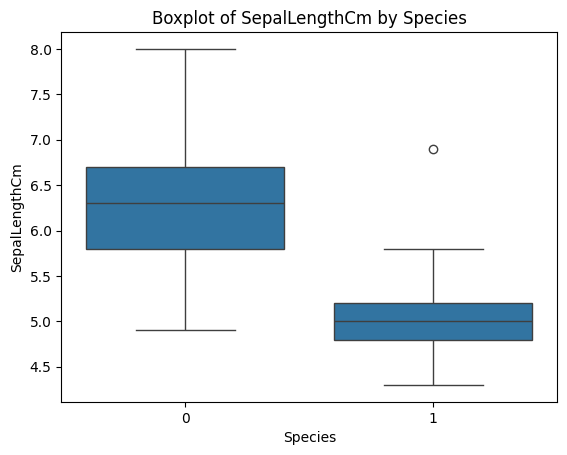

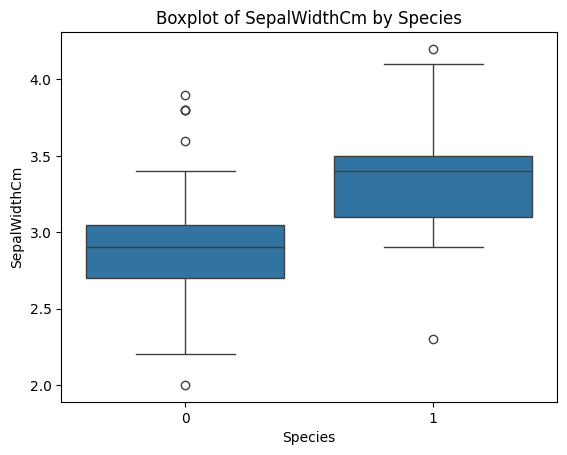

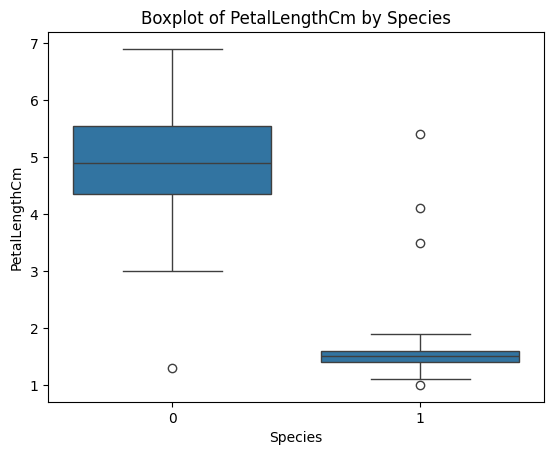

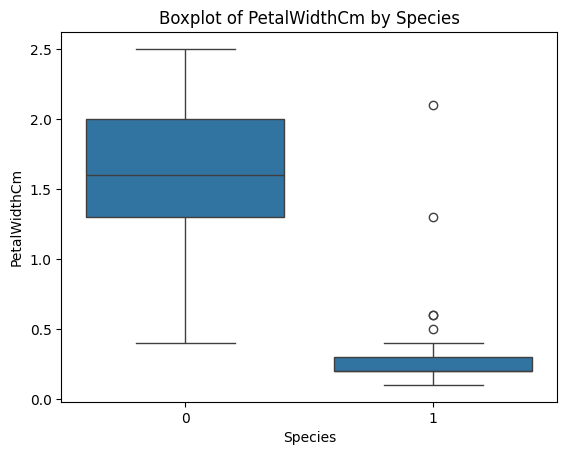

In [122]:
# Boxplotting the features after removing the outliers
eatures = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for feature in features:
    sns.boxplot(x = 'Species', y = feature, data = iris)
    plt.title('Boxplot of ' + feature + ' by Species')
    plt.show()

We hebben de data opnieuw geplot, en het valt op dat de outliers niet verwijderd zijn. Dit betekend dat de outliers niet extreem genoeg waren. Dit zouden we kunnen aanpassen door de multiplier van de `upperbound` en `lowerbound` te verlagen.

# Using the Model and Presenting Results

In [123]:
# Splitting the dataset into the Training set and Test set
y = iris['Species']
X = iris.drop(['Species', 'Id', iris.columns[0]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Initialize the model
logreg= LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predicting the Test set results
y_pred = logreg.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("The accuracy of the model is: ", accuracy*100, "%")


The accuracy of the model is:  100.0 %


Nu dat de outliers 'verwijderd' zijn, is er eigenlijk niks veranderd aan het resultaat. Het model heeft alsnog een accuratie van 93%-100%, dus ongeveer 0-2 fouten.

# K-Means Clustering 

##### K-Means Clustering

K-Means is een algoritme voor ongecontroleerd leren dat wordt gebruikt om gegevens in verschillende groepen of clusters te classificeren. Het doel is om de gegevens zo te organiseren dat items in hetzelfde cluster meer op elkaar lijken dan items in verschillende clusters.

Het algoritme werkt door eerst willekeurige "centroïden" te kiezen. Elk datapunt wordt vervolgens toegewezen aan het dichtstbijzijnde centroïde, en die clusters worden bijgewerkt om het middelpunt (of de "gemiddelde") positie van alle datapunten in het cluster te zijn. Dit proces wordt herhaald totdat de clusters niet meer significant veranderen.

##### Ongecontroleerd leren

Ongecontroleerd leren is een type machine learning waarbij het model patronen in de gegevens leert zonder dat er labels beschikbaar zijn. Dit is anders dan gecontroleerd leren, waarbij elk datapunt een bijbehorend label of doel heeft.

Bij ongecontroleerd leren is het doel om de onderliggende structuur of distributie in de gegevens te ontdekken. Dit kan betekenen het vinden van clusters van vergelijkbare datapunten (zoals bij K-Means), het vinden van anomalieën of outliers, of het leren van de onderliggende verdeling van de gegevens.

In [124]:
# Import 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

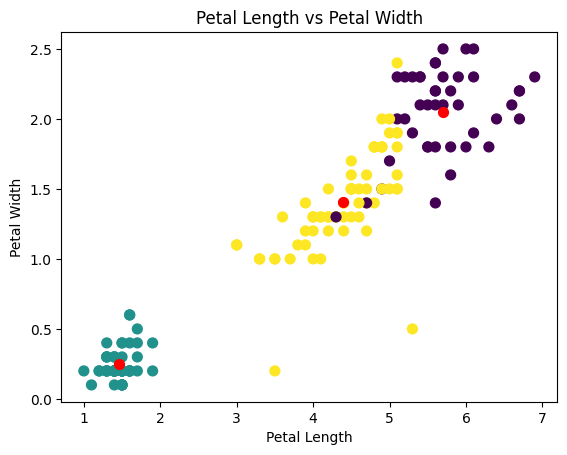

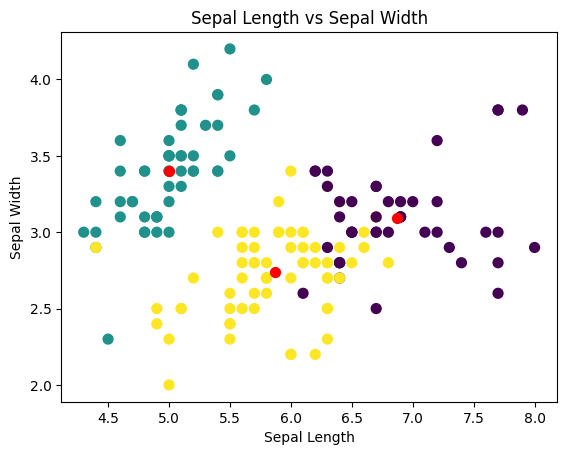

In [125]:
#K means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Getting the values of the centroids
centroids = kmeans.cluster_centers_

# Plotting the data points and centroids
plt.scatter(X['PetalLengthCm'], X['PetalWidthCm'], c= kmeans.labels_.astype(float), s=50, alpha=1)
plt.scatter(centroids[:, 2], centroids[:, 3], c='red', s=50)
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

# Plotting the data points and centroids
plt.scatter(X['SepalLengthCm'], X['SepalWidthCm'], c= kmeans.labels_.astype(float), s=50, alpha=1)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


# Extra: Guassian Mixture

In [126]:
# Import 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [132]:
from sklearn.decomposition import PCA  # 1. choose model class
model = PCA(n_components=2)            # 2. instantiate model
model.fit(X)                      # 3. fit model to data
X_2D = model.transform(X)               # 4. determine labels

     Unnamed: 0   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
0             0    0            5.1           3.5            1.4   
1             1    1            4.7           3.2            1.6   
2             2    2            4.9           3.1            1.5   
3             3    3            4.4           2.9            1.4   
4             4    4            5.0           3.4            1.5   
..          ...  ...            ...           ...            ...   
168         168  168            6.8           3.0            5.5   
169         169  169            6.4           2.7            5.3   
170         170  170            7.2           3.6            6.1   
171         171  171            6.3           3.3            6.0   
172         172  172            6.4           2.7            5.3   

     PetalWidthCm  Species      PCA1      PCA2  cluster  
0             0.2        1 -2.714485  0.362091        0  
1             0.2        1 -2.669170 -0.163066        0  
2        

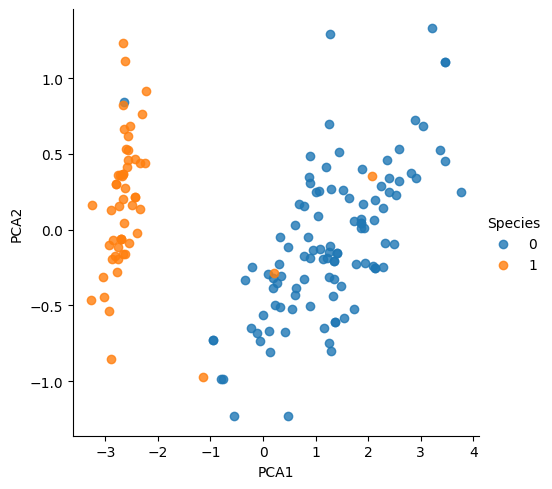

In [134]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
print(iris)
sns.lmplot(x="PCA1", y="PCA2", hue='Species', data=iris, fit_reg=False)

In [129]:
from sklearn.mixture import GaussianMixture      # 1. choose model class
model = GaussianMixture(n_components=3,
                                 covariance_type='full')  # 2. instantiate model
model.fit(X)                                # 3. fit model to data
y_gmm = model.predict(X)   

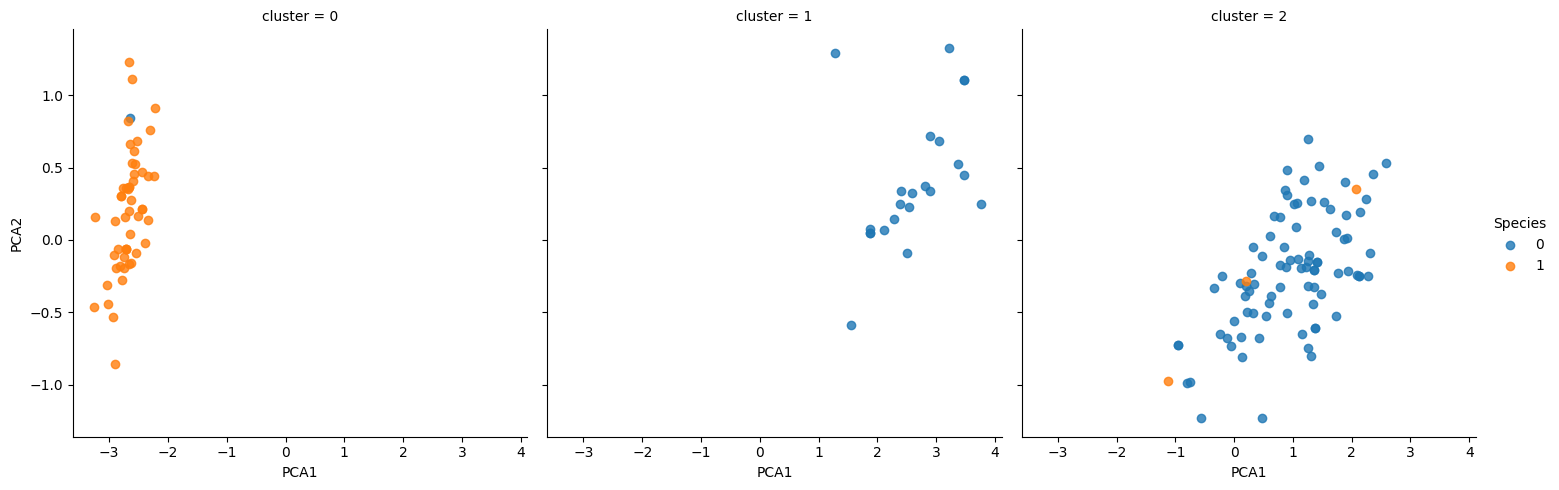

In [130]:
iris['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='Species',
        col='cluster', fit_reg=False);